In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [5]:
%cd drive/MyDrive/

/content/drive/MyDrive


In [ ]:
!pwd

/content/drive/MyDrive


In [ ]:
!git clone https://github.com/reillyn51/340wProject.git

Cloning into '340wProject'...
remote: Enumerating objects: 254, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 254 (delta 13), reused 8 (delta 8), pack-reused 235
Receiving objects: 100% (254/254), 38.15 MiB | 11.07 MiB/s, done.
Resolving deltas: 100% (100/100), done.
Updating files: 100% (43/43), done.


In [ ]:
!cd drive/MyDrive/

/bin/bash: line 0: cd: drive/MyDrive/: No such file or directory


In [6]:
import pandas as pd
import numpy as np
df = pd.read_csv('340wProject/data/Beat the bookies/closing_odds.csv')
df.head()

,match_id,league,match_date,home_team,home_score,away_team,away_score,avg_odds_home_win,avg_odds_draw,avg_odds_away_win,max_odds_home_win,max_odds_draw,max_odds_away_win,top_bookie_home_win,top_bookie_draw,top_bookie_away_win,n_odds_home_win,n_odds_draw,n_odds_away_win
0,170088,England: Premier League,2005-01-01,Liverpool,0,Chelsea,1,2.9944,3.1944,2.2256,3.20,3.25,2.29,Paddy Power,Sportingbet,Expekt,9,9,9
1,170089,England: Premier League,2005-01-01,Fulham,3,Crystal Palace,1,1.9456,3.2333,3.6722,2.04,3.30,4.15,Pinnacle Sports,bet-at-home,Expekt,9,9,9
2,170090,England: Premier League,2005-01-01,Aston Villa,1,Blackburn,0,1.8522,3.2611,4.0144,2.00,3.40,4.50,Pinnacle Sports,Paddy Power,Sportingbet,9,9,9
3,170091,England: Premier League,2005-01-01,Bolton,1,West Brom,1,1.6122,3.4133,5.4722,1.67,3.57,6.27,Coral,Pinnacle Sports,Pinnacle Sports,9,9,9
4,170092,England: Premier League,2005-01-01,Charlton,1,Arsenal,3,5.9878,3.4778,1.5567,7.00,3.60,1.62,Expekt,Paddy Power,bet365,9,9,9


In [7]:
# calculate the Kelly criterion column
subset = df[['match_id','home_score','away_score','max_odds_home_win']]
subset['home_win'] = np.where(subset['home_score'] > subset['away_score'], True, False) # outcome column
subset['p_cons'] =  1/df['avg_odds_home_win'] #probability of an event happening
p_unfavorable_cons = 1 - subset['p_cons'] 
b = df['max_odds_home_win'] # ?
subset['kelly_criterion_percent'] = subset['p_cons'] - (p_unfavorable_cons / b)
subset['p_cons']

<ipython-input-7-ce688fa62e12>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['home_win'] = np.where(subset['home_score'] > subset['away_score'], True, False) # outcome column
<ipython-input-7-ce688fa62e12>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['p_cons'] =  1/df['avg_odds_home_win'] #probability of an event happening
<ipython-input-7-ce688fa62e12>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

0         0.333957
1         0.513980
2         0.539898
3         0.620270
4         0.167006
            ...   
479435    0.593895
479436    0.076240
479437    0.058053
479438    0.063636
479439    0.212112
Name: p_cons, Length: 479440, dtype: float64

In [8]:
# Calculating the expected payout for each game
alpha = .034 #constant that depends on victory (0.034 for home win)
omega = df['max_odds_home_win'] # odds paid out by the bookmaker
subset['E(pi)'] = (subset['p_cons'] - alpha) * omega-1 #
print(subset.shape, subset.columns)

(479440, 8) Index(['match_id', 'home_score', 'away_score', 'max_odds_home_win', 'home_win',
       'p_cons', 'kelly_criterion_percent', 'E(pi)'],
      dtype='object')


<ipython-input-8-368d3166f577>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['E(pi)'] = (subset['p_cons'] - alpha) * omega-1 #


In [9]:
# determining when to bet 
subset['place_bet'] = np.where(subset['E(pi)'] > 0, True, False) # outcome column
print(subset)

        match_id  home_score  away_score  max_odds_home_win  home_win  \
0         170088           0           1               3.20     False   
1         170089           3           1               2.04      True   
2         170090           1           0               2.00      True   
3         170091           1           1               1.67     False   
4         170092           1           3               7.00     False   
...          ...         ...         ...                ...       ...   
479435    876806           1           2               1.83     False   
479436    876807           1           1              19.00     False   
479437    876808           0           5              22.00     False   
479438    876809           0           3              34.00     False   
479439    876812           0           0               5.46     False   

          p_cons  kelly_criterion_percent     E(pi)  place_bet  
0       0.333957                 0.125818 -0.040138      F

<ipython-input-9-f04ba2a3aa02>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['place_bet'] = np.where(subset['E(pi)'] > 0, True, False) # outcome column


In [11]:
# adding wealth to subset
initial_wealth = 50
wealth = []
for i in range(len(subset)):
  
  if subset['place_bet'][i] == True: 
    if subset['home_win'][i] == True:
      # bet won, wealth then gets increased by bet payout
        wealth.append(initial_wealth * subset['kelly_criterion_percent'][i] * subset['max_odds_home_win'][i] + ( initial_wealth - (initial_wealth * subset['kelly_criterion_percent'][i])))
    else:
        wealth.append(initial_wealth - (initial_wealth * subset['kelly_criterion_percent'][i]))
      
  else:
      wealth.append(0)

subset['wealth'] = wealth

<ipython-input-11-c46315aa7e0a>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['wealth'] = wealth


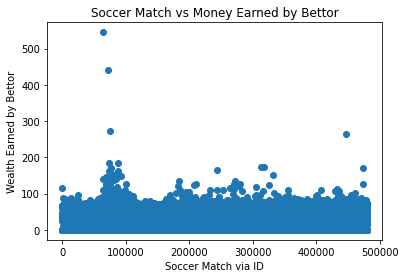

In [12]:
# make one graph plotting games vs wealth
import matplotlib.pyplot as plt
x = subset.index
y = wealth
plt.scatter(x, y)
plt.xlabel('Soccer Match via ID')
plt.ylabel('Wealth Earned by Bettor')
plt.title('Soccer Match vs Money Earned by Bettor')
plt.show()

In [13]:
print('Total money earned using our method: ', sum(subset['wealth']))

Total money earned using our method:  6607920.491723742
